In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [114]:
print ('Для age пустых строк ' + str( len(data[data['age'] == '?'])))
print ('Для workclass пустых строк ' + str( len(data[data['workclass'] == '?'])))
print ('Для fnlwgt пустых строк ' + str( len(data[data['fnlwgt'] == '?'])))
print ('Для education пустых строк ' + str( len(data[data['education'] == '?'])))
print ('Для educational-num пустых строк ' + str( len(data[data['educational-num'] == '?'])))
print ('Для marital-status пустых строк ' + str( len(data[data['marital-status'] == '?'])))
print ('Для occupation пустых строк ' + str( len(data[data['occupation'] == '?'])))
print ('Для relationship пустых строк ' + str( len(data[data['relationship'] == '?'])))
print ('Для race пустых строк ' + str( len(data[data['race'] == '?'])))
print ('Для gender пустых строк ' + str( len(data[data['gender'] == '?'])))
print ('Для capital-gain пустых строк ' + str( len(data[data['capital-gain'] == '?'])))
print ('Для capital-loss пустых строк ' + str( len(data[data['capital-loss'] == '?'])))
print ('Для hours-per-week пустых строк ' + str( len(data[data['hours-per-week'] == '?'])))
print ('Для native-country пустых строк ' + str( len(data[data['native-country'] == '?'])))
print ('Для income пустых строк ' + str( len(data[data['income'] == '?'])))

print ('Всего строк в наборе ' + str( len( data ) ))

Для age пустых строк 0
Для workclass пустых строк 2799
Для fnlwgt пустых строк 0
Для education пустых строк 0
Для educational-num пустых строк 0
Для marital-status пустых строк 0
Для occupation пустых строк 2809
Для relationship пустых строк 0
Для race пустых строк 0
Для gender пустых строк 0
Для capital-gain пустых строк 0
Для capital-loss пустых строк 0
Для hours-per-week пустых строк 0
Для native-country пустых строк 857
Для income пустых строк 0
Всего строк в наборе 48842


In [116]:
#data = data.applymap(lambda x: 0 if (type(x) is str and '?' in x) else x)
data.loc[data["gender"] == "Male","gender"] = 0
data.loc[data["gender"] == "Female","gender"] = 1
data.loc[data["income"] == "<=50K","income"] = 0
data.loc[data["income"] == ">50K","income"] = 1
data_dummies = pd.get_dummies(data, columns=['occupation', 'relationship', 'education','workclass', 'race'])
Y = data['income']
data_dummies.drop([ "marital-status", "native-country", 'income' ,'occupation_?', 'workclass_?', 'race_Other'], axis=1, inplace=True)
data_dummies

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White
0,25,226802,7,0,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,38,89814,9,0,0,0,50,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,28,336951,12,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,160323,10,0,7688,0,40,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,18,103497,10,1,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,1,0,0,38,0,0,0,...,0,1,0,0,0,0,0,0,0,1
48838,40,154374,9,0,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
48839,58,151910,9,1,0,0,40,1,0,0,...,0,1,0,0,0,0,0,0,0,1
48840,22,201490,9,0,0,0,20,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
X1 = data[['age', 'hours-per-week','gender']]
X1

,age,hours-per-week,gender
0,25,40,0
1,38,50,0
2,28,40,0
3,44,40,0
4,18,30,1
...,...,...,...
48837,27,38,1
48838,40,40,0
48839,58,40,1
48840,22,20,0


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 0)

In [134]:
model = LogisticRegression()
model.fit( X_train, Y_train )
predictions = model.predict_proba(X_test)

C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


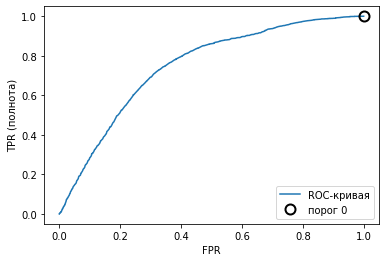

In [123]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions[:, 1])
plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [117]:
import hashlib
cols=[i for i in data.columns]
for col in cols:
    data[col] = data[col].apply(lambda x: hashlib.sha256(x.encode("utf-8")).hexdigest())
data.drop(["income"], axis='columns', inplace=True)
X2 = data_dummies

In [118]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 0)

In [120]:
model2 = LogisticRegression()
model2.fit( X2_train, Y_train )
predictions2 = model2.predict_proba(X2_test)

C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


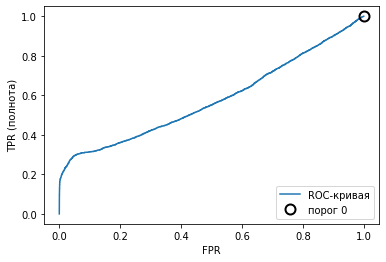

In [124]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions2[:, 1])
plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [140]:
data_dummies2 = pd.get_dummies(data, columns=[ 'education','workclass'])
Y = data['income']
data_dummies2.drop([ 'relationship',"marital-status", "native-country", 'income' ,'occupation', 'workclass_?', 'race'], axis=1, inplace=True)
X3 = data_dummies2

In [141]:
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.3, random_state = 0)

In [142]:
model3 = LogisticRegression()
model3.fit( X3_train, Y_train )
predictions3 = model3.predict_proba(X3_test)

C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


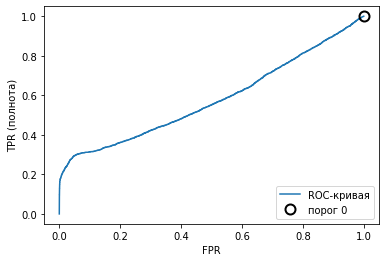

In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions3[:, 1])
plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=3)

In [137]:
rf.fit( X_train, Y_train )
predictions_rf = rf.predict_proba(X_test)

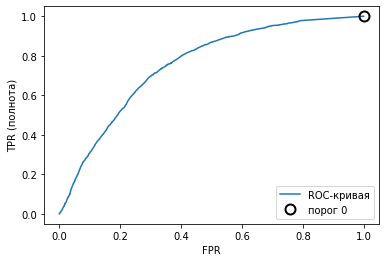

In [138]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions_rf[:, 1])
plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [147]:
from sklearn.metrics import roc_auc_score

In [148]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7466575410976277

In [149]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.5791981470275787

In [150]:
roc_auc_score( Y_test, predictions3[:, 1] )

0.5793293345324798

In [151]:
roc_auc_score( Y_test, predictions_rf[:, 1] )

0.7541226107641699

In [152]:
from sklearn.metrics import auc

In [153]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions[:, 1])
auc(fpr, tpr)

0.7466575410976277

In [154]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions2[:, 1])
auc(fpr, tpr)

0.5791981470275787